In [6]:
!pip install pandas-datareader

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [8]:
start = '2008-01-01'
end = '2021-12-31'
df = data.DataReader('AAPL','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2007-12-31,7.160714,7.062500,7.125000,7.074286,5.393332e+08,6.030249
2008-01-02,7.152143,6.876786,7.116786,6.958571,1.079179e+09,5.931611
2008-01-03,7.049643,6.881786,6.978929,6.961786,8.420664e+08,5.934350
2008-01-04,6.892857,6.388929,6.837500,6.430357,1.455832e+09,5.481352
2008-01-07,6.557143,6.079643,6.473214,6.344286,2.072193e+09,5.407983


In [9]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-27,180.419998,177.070007,177.089996,180.330002,74919600.0,179.289459
2021-12-28,181.330002,178.529999,180.160004,179.289993,79144300.0,178.255447
2021-12-29,180.630005,178.139999,179.330002,179.380005,62348900.0,178.344940
2021-12-30,180.570007,178.089996,179.470001,178.199997,59773000.0,177.171722
2021-12-31,179.229996,177.259995,178.089996,177.570007,64062300.0,176.545395


In [10]:
df=df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2007-12-31,7.160714,7.062500,7.125000,7.074286,5.393332e+08,6.030249
1,2008-01-02,7.152143,6.876786,7.116786,6.958571,1.079179e+09,5.931611
2,2008-01-03,7.049643,6.881786,6.978929,6.961786,8.420664e+08,5.934350
3,2008-01-04,6.892857,6.388929,6.837500,6.430357,1.455832e+09,5.481352
4,2008-01-07,6.557143,6.079643,6.473214,6.344286,2.072193e+09,5.407983


In [11]:
df= df.drop(['Date','Adj Close'],axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,7.160714,7.062500,7.125000,7.074286,5.393332e+08
1,7.152143,6.876786,7.116786,6.958571,1.079179e+09
2,7.049643,6.881786,6.978929,6.961786,8.420664e+08
3,6.892857,6.388929,6.837500,6.430357,1.455832e+09
4,6.557143,6.079643,6.473214,6.344286,2.072193e+09


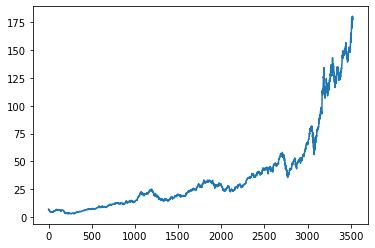

In [12]:
plt.plot(df.Close)

In [14]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3522    153.3444
3523    153.6667
3524    153.9991
3525    154.3202
3526    154.6399
Name: Close, Length: 3527, dtype: float64

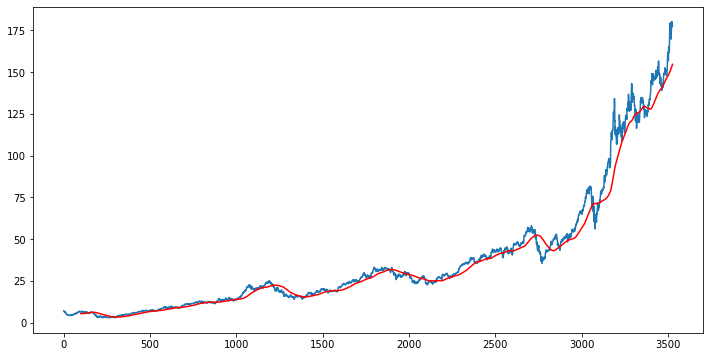

In [15]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [16]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3522    142.85570
3523    143.13220
3524    143.40125
3525    143.66845
3526    143.95365
Name: Close, Length: 3527, dtype: float64

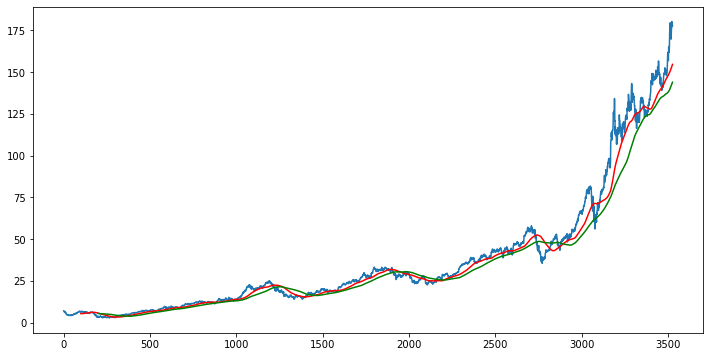

In [17]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [18]:
# spliting data into training and testing
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(2468, 1)
(1059, 1)


In [19]:
from sklearn.preprocessing import MinMaxScaler

# create the scaler object
scaler = MinMaxScaler(feature_range=(0, 1))

data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.11202169],
       [0.10899406],
       [0.10907817],
       ...,
       [0.95381958],
       [0.97272346],
       [0.97658271]])

In [22]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)    

In [24]:
# Ml model
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [25]:
model = Sequential()
model.add(LSTM(units = 50,activation = 'relu',return_sequences= True,input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60,activation = 'relu',return_sequences= True))
model.add(Dropout(0.3))



model.add(LSTM(units = 80,activation = 'relu',return_sequences= True))
model.add(Dropout(0.4))



model.add(LSTM(units = 120,activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1))


In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [27]:
model.compile(optimizer = 'adam',loss = 'mean_squared_error')
model.fit(x_train,y_train,epochs=55)

Epoch 1/55
74/74 [==============================] - 14s 145ms/step - loss: 0.0380
Epoch 2/55
74/74 [==============================] - 11s 144ms/step - loss: 0.0086
Epoch 3/55
74/74 [==============================] - 11s 144ms/step - loss: 0.0080
Epoch 4/55
74/74 [==============================] - 10s 137ms/step - loss: 0.0070
Epoch 5/55
74/74 [==============================] - 10s 136ms/step - loss: 0.0062
Epoch 6/55
74/74 [==============================] - 10s 136ms/step - loss: 0.0059
Epoch 7/55
74/74 [==============================] - 10s 138ms/step - loss: 0.0054
Epoch 8/55
74/74 [==============================] - 10s 136ms/step - loss: 0.0054
Epoch 9/55
74/74 [==============================] - 10s 138ms/step - loss: 0.0047
Epoch 10/55
74/74 [==============================] - 10s 140ms/step - loss: 0.0049
Epoch 11/55
74/74 [==============================] - 10s 137ms/step - loss: 0.0048
Epoch 12/55
74/74 [==============================] - 10s 139ms/step - loss: 0.0040
Epoch 13/55
7

In [28]:
model.save('keras_model.h5')


In [30]:
past_100_days = data_training.tail(100)

In [31]:
final_df = past_100_days.append(data_testing,ignore_index=True)

In [32]:
final_df.head()

,Close
0,38.402500
1,38.417500
2,38.189999
3,38.294998
4,38.862499


In [34]:
input_data = scaler.fit_transform(final_df)
input_data
input_data.shape

(1159, 1)

In [36]:
x_test = []
y_test = []
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i,0])

In [37]:
x_test,y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1059, 100, 1)
(1059,)


In [38]:
# making predictions

y_pred = model.predict(x_test)

34/34 [==============================] - 2s 46ms/step


In [39]:
y_pred.shape

(1059, 1)

In [40]:
scaler.scale_

array([0.00690691])

In [41]:
scaler_factor = 1/0.00690691
y_pred = y_pred * scaler_factor
y_test = y_test * scaler_factor

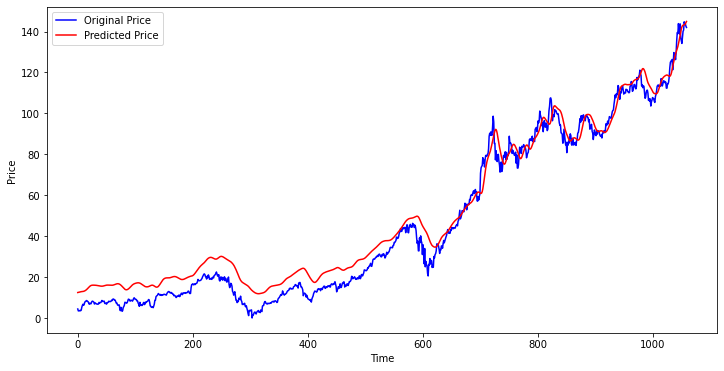

In [43]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label = 'Original Price')
plt.plot(y_pred,'r',label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()